-- epoch 0
loss is 0.7093591094017029, accuracy is 0.5
-- epoch 50
loss is 0.6933446526527405, accuracy is 0.5
-- epoch 100
loss is 0.6889116168022156, accuracy is 0.5
-- epoch 150
loss is 0.6626697182655334, accuracy is 0.5
-- epoch 200
loss is 0.588459849357605, accuracy is 0.75
-- epoch 250
loss is 0.4986635446548462, accuracy is 0.75
-- epoch 300
loss is 0.3995102345943451, accuracy is 0.75
-- epoch 350
loss is 0.29387930035591125, accuracy is 1.0
-- epoch 400
loss is 0.2047528624534607, accuracy is 1.0
-- epoch 450
loss is 0.1438068002462387, accuracy is 1.0
500 trainings is finished!
Final loss is 0.10561499744653702, accuracy is 1.0

 The parameters that perform with (at least) 90.0% accuracy are:

334 trainings, accuracy is 1.0, loss is 0.3260631859302521
tensor([ 2.6577e+00, -1.1148e-03], grad_fn=<SelectBackward>)
tensor(-0.0002, grad_fn=<SelectBackward>)
tensor([ 1.9023, -1.3631], grad_fn=<SelectBackward>)
tensor(-0.2256, grad_fn=<SelectBackward>)

335 trainings, accuracy is 

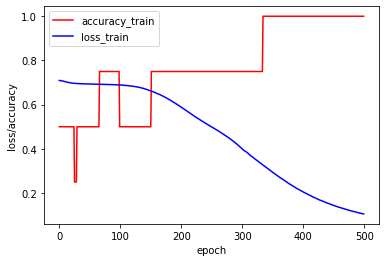

In [7]:
# ex1 a)

from HW2_util import TwoLayerLinearClassificationNN as TwoLayerNN

training_data_x_ex1a = [[1,0],
                        [-1,0],
                        [0,1],
                        [0,-1]]
training_data_y_ex1a = [1,1,2,2]

ex1a_model = TwoLayerNN(training_data_x_ex1a, training_data_y_ex1a,
                        learning_rate=0.01,
                        batchsize=4)
ex1a_model.train_model(500)
ex1a_model.plot_loss_accuracy()
ex1a_model.find_accurate_params_after_training(nbr_of_good_params=4)


-- epoch 0
loss is 0.6837110817432404, accuracy is 0.5
-- epoch 20
loss is 0.21550721675157547, accuracy is 0.925
-- epoch 40
loss is 0.1895071754232049, accuracy is 0.92
-- epoch 60
loss is 0.1842146808281541, accuracy is 0.92
-- epoch 80
loss is 0.18706322479993104, accuracy is 0.925
-- epoch 100
loss is 0.18405556976795195, accuracy is 0.915
-- epoch 120
loss is 0.1867039892822504, accuracy is 0.915
-- epoch 140
loss is 0.1842187692411244, accuracy is 0.92
-- epoch 160
loss is 0.18134758309461177, accuracy is 0.92
-- epoch 180
loss is 0.1813642205670476, accuracy is 0.92
200 trainings is finished!
Final loss is 0.1842278421856463, accuracy is 0.925

 The parameters that perform with (at least) 90.0% accuracy are:

7 trainings, accuracy is 0.9, loss is 0.42578278928995134
tensor([ 0.4993, -2.8433], grad_fn=<SelectBackward>)
tensor(-0.7741, grad_fn=<SelectBackward>)
tensor([1.5996, 2.0231], grad_fn=<SelectBackward>)
tensor(-2.6746, grad_fn=<SelectBackward>)

9 trainings, accuracy is 0

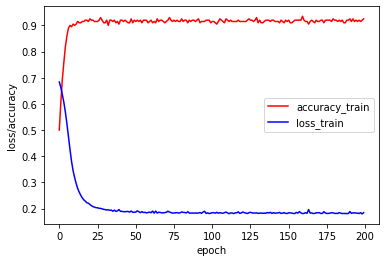

In [9]:
# ex1 b)
import pandas as pd
import numpy as np
from HW2_util import TwoLayerLinearClassificationNN as MyModel

df = pd.read_csv('./data/data_HW2_ex1.csv')
X = np.column_stack((df['x1'].values, df['x2'].values))
y = df['class'].values

ex1b_model = MyModel(X, y, learning_rate=0.01, batchsize=10, optim='SGD')
ex1b_model.train_model(200)
ex1b_model.plot_loss_accuracy()
ex1b_model.find_accurate_params_after_training()

In [4]:
# ex 3 CNN
from torchvision import datasets
import torchvision.transforms as transforms
from HW2_util import MyCNNNetTrainer as MyCNN


MNIST_training_set = datasets.MNIST('./data/HW2/data_sets', train=True, download=True, transform=transforms.ToTensor())
MNIST_test_set = datasets.MNIST('./data/HW2/data_sets', train=False, download=True, transform=transforms.ToTensor())

cnn_training_model = MyCNN(MNIST_training_set, MNIST_test_set, middle_channel=4)
cnn_df = cnn_training_model.result
# cnn_training_model.plot_loss_accuracy()

-- epoch 0 --
    loss (train, test): 0.6703613256079455, 0.3167970873638988
    accuracy (train, test): 0.81175, 0.9072
-- epoch 1 --
    loss (train, test): 0.31964884875776867, 0.23733536797296256
    accuracy (train, test): 0.9041666666666667, 0.9301
-- epoch 2 --
    loss (train, test): 0.2519679234204814, 0.18911317882454023
    accuracy (train, test): 0.9251, 0.9438
-- epoch 3 --
    loss (train, test): 0.2068134349755322, 0.15551843749266117
    accuracy (train, test): 0.9373666666666667, 0.9533
-- epoch 4 --
    loss (train, test): 0.17781571308732963, 0.13355587503127753
    accuracy (train, test): 0.9471833333333334, 0.9593
5 trainings is finished! Spent time 97.9672908782959 seconds.
Final loss (train, test): 0.17781571308732963, 0.13355587503127753
Final accuracy (train, test): 0.9471833333333334, 0.9593


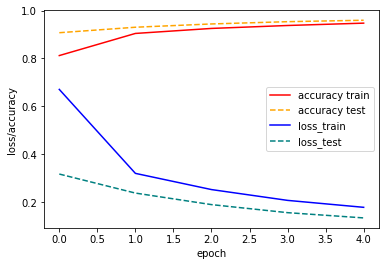

In [5]:
import matplotlib.pyplot as plt

df = cnn_df
plt.figure(1)
plt.grid(True)
plt.clf()
plt.plot(df['epoch'], df['accuracy_train'], color='red')
plt.plot(df['epoch'], df['accuracy_test'], color='orange', linestyle='dashed')
plt.plot(df['epoch'], df['loss_train'], color='blue')
plt.plot(df['epoch'], df['loss_test'], color='teal', linestyle='dashed')
plt.xlabel(r'epoch')
plt.ylabel(r'loss/accuracy')
plt.legend(['accuracy train', 'accuracy test', 'loss_train', 'loss_test'])
plt.show()